In [1]:
import numpy as np

import rlcard
from rlcard.agents import CFRAgent
from rlcard import models
from rlcard.utils import set_global_seed, tournament
from rlcard.utils import Logger

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi


Instructions for updating:
non-resource variables are not supported in the long term


Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.



Instructions for updating:
Please switch to tf.train.get_global_step
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /Users/pete/DS/Capstones/Capstone3/capstone-3/rlcard/rlcard/m

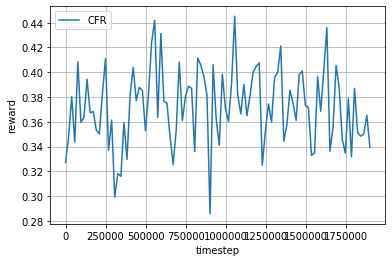

In [2]:
# Make environment and enable human mode
env = rlcard.make('leduc-holdem', config={'seed': 0, 'allow_step_back':True})
eval_env = rlcard.make('leduc-holdem', config={'seed': 0})

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
save_plot_every = 1000
evaluate_num = 10000
episode_num = 10000

# The paths for saving the logs and learning curves
log_dir = './experiments/leduc_holdem_cfr_result/'

# Set a global seed
set_global_seed(0)

# Initilize CFR Agent
agent = CFRAgent(env)
agent.load()  # If we have saved model, we first load the model

# Evaluate CFR against pre-trained NFSP
eval_env.set_agents([agent, models.load('leduc-holdem-nfsp').agents[0]])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

for episode in range(episode_num):
    agent.train()
    print('\rIteration {}'.format(episode), end='')
    # Evaluate the performance. Play with NFSP agents.
    if episode % evaluate_every == 0:
        agent.save() # Save model
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('CFR')

# save_dir = 'my_models'
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)
# saver = tf.train.Saver()
# saver.save(sess, os.path.join(save_dir, 'model'))

In [ ]:
# Save model
import os
import tensorflow as tf

save_dir = 'my_models'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
saver = tf.train.Saver()
saver.save(sess, os.path.join(save_dir, 'model'))